<a href="https://colab.research.google.com/github/matteonerini/sudoku-generator-and-solver/blob/main/skyscrapers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skyscrapers Generator and Solver

Skyscrapers is a logic-based puzzle in which the objective is to fill a $d$x$d$ grid with numerical digits from 1 to $d$, which indicate the height of the skyscrapers, according to the following rules:
- Each row and each column must contain all the digits from 1 to $d$.
- The numbers on the sides of the grid indicate how many skyscrapers are visible from that direction.

In this script, we propose simple yet interesting recursive algorithms to find all the solutions of a given Skyscrapers puzzle, and to generate new puzzles such that they have a unique solution.

In [31]:
# Import relevant libraries
import numpy as np
from random import randint, shuffle
import matplotlib.pyplot as plt
from itertools import permutations

# Utility variables
d = 4
numbers = list(range(1,d+1))
cells = list(range((d+2)**2))

# Count the visible skyscrapers in the line 'x' from a given direction
# direction = 'n'/'s'/'w'/'e'
def n_visible(grid,x,direction):
    counter = 0
    highest = 0
    if   direction == 'n':
        line = grid[:,x]
    elif direction == 's':
        line = grid[:,x][::-1]
    elif direction == 'w':
        line = grid[x,:]
    elif direction == 'e':
        line = grid[x,:][::-1]
    else:
        print('Insert a correct direction')
        return 0
    for n in line:
        if n > highest:
            highest = n
            counter+=1
    return counter

# Check if the cell 'board[y,x]' can assume the value 'n'
def possible(board,y,x,n):
    grid = board[1:-1,1:-1]
    grid_temp = np.copy(grid)
    # Check if 'n' is already in row 'y' or in column 'x'
    for i in range(d):
        if grid[y][i] == n or grid[i][x] == n:
            return False
    # Check the requirements on the column
    find_column = False
    for line in list((permutations(np.delete(range(1,d+1),n-1)))):
        line_i = 0
        for i in range(d):
            if grid[i,x] == 0:
                if i == y:
                    grid_temp[y,x] = n
                else:
                    grid_temp[i,x] = line[line_i]
                    line_i+=1
        if board[0,x+1] == 0 or board[0,x+1] == n_visible(grid_temp,x,'n'):
            if board[-1,x+1] == 0 or board[-1,x+1] == n_visible(grid_temp,x,'s'):
                find_column = True
                break
    # Check the requirements on the row
    find_row = False
    for line in list((permutations(np.delete(range(1,d+1),n-1)))):
        line_i = 0
        for i in range(d):
            if grid[y,i] == 0:
                if i == x:
                    grid_temp[y,x] = n
                else:
                    grid_temp[y,i] = line[line_i]
                    line_i+=1
        if board[y+1,0] == 0 or board[y+1,0] == n_visible(grid_temp,y,'w'):
            if board[y+1,-1] == 0 or board[y+1,-1] == n_visible(grid_temp,y,'e'):
                find_row = True
                break
    return find_row and find_column

# Backtracking algorithm implementation to solve a Skyscrapers puzzle
def solve(board):
    global board_solved
    global n_solutions
    for y in range(d):
        for x in range(d):
            if board[y+1][x+1] == 0:
                for n in range(1,d+1):
                    if possible(board,y,x,n):
                        board[y+1][x+1] = n
                        solve(board)
                        board[y+1][x+1] = 0
                return
    print(board)
    #input("More solutions?")
    #board_solved = np.copy(board)
    n_solutions+=1

# Faster implementation of the backtraking algorithm whose objective is to
# determine if the Skyscrapers puzzle does not have a unique solution
def solve_fast(board):
    global board_solved
    global n_solutions
    global end_solver
    for y in range(d):
        for x in range(d):
            if board[y+1][x+1] == 0:
                for n in range(1,d+1):
                    if possible(board,y,x,n):
                        board[y+1][x+1] = n
                        solve_fast(board)
                        if not(end_solver):
                            board[y+1][x+1] = 0
                return
    #print(board)
    n_solutions+=1
    if n_solutions == 2:
        end_solver = True

# Randomly fill an empty board with dimension d
def fill(board):
    global board_filled
    d = len(board) - 2
    for y in range(d):
        for x in range(d):
            if board[y+1][x+1] == 0:
                shuffle(numbers)
                for n in numbers:
                    if possible(board,y,x,n):
                        board[y+1][x+1] = n
                        if not(np.all(board[1:-1,1:-1])):
                            fill(board)
                            board[y+1][x+1] = 0
                        else:
                            board_filled = np.copy(board)
                return

# Create a Skyscrapers puzzle from a fully filled board
def create(board):
    global n_solutions
    global end_solver
    shuffle(cells)
    for i in range((d+2)**2):
        y = cells[i] // (d+2)
        x = cells[i] % (d+2)
        backup = board[y][x]
        board[y][x] = 0
        board_copy = np.copy(board)
        n_solutions = 0
        end_solver = False
        solve_fast(board_copy)
        if n_solutions != 1:
            board[y][x] = backup
        #print('\b\b\b\b{:03d}'.format(i+1) )

# Substitute '0' with ' ' in a board
def get_board_str(i):
    return ' ' if i == 0 else '{}'.format(i)

# Plot the board to create an enjoyable Skyscrapers puzzle
def board2pdf(board):
    board_str = np.vectorize(get_board_str)(board)
    # Create a figure
    fig, ax = plt.subplots()
    im = ax.imshow(board,cmap='binary', vmin=255, vmax=255)
    # Add the clues to the figure
    for i in range(d+2):
        for j in range(d+2):
            text = ax.text(j, i, board_str[i,j],
                           ha='center', va='center', color='k')
    # Add the lines
    plt.axhline(y=-0.5, xmin=1/(d+2), xmax=(d+1)/(d+2), linewidth=3, color='k')
    plt.axvline(x=-0.5, ymin=1/(d+2), ymax=(d+1)/(d+2), linewidth=3, color='k')
    plt.axhline(y=0.5, linewidth=3, color='k')
    plt.axvline(x=0.5, linewidth=3, color='k')
    for i in range(1,d):
        plt.axhline(y=i+0.5, linewidth=1, color='k')
        plt.axvline(x=i+0.5, linewidth=1, color='k')
    plt.axhline(y=d+0.5, linewidth=3, color='k')
    plt.axvline(x=d+0.5, linewidth=3, color='k')
    plt.axhline(y=d+1.5, xmin=1/(d+2), xmax=(d+1)/(d+2), linewidth=3, color='k')
    plt.axvline(x=d+1.5, ymin=1/(d+2), ymax=(d+1)/(d+2), linewidth=3, color='k')
    # Plot the figure without axis
    plt.axis('off')
    plt.savefig('skyscrapers.pdf', bbox_inches='tight')
    plt.savefig('skyscrapers.png', bbox_inches='tight')

## Skyscrapers Resolution

The function `solve`, implementing the backtraking algorithm, is called to solve a given Skyscrapers puzzle, specified by the variable `board`. Thus, all the possible solutions, i.e. the complete grids, are showed.

In [32]:
# Input board
d = 4
board = np.array([[0, 3, 2, 2, 1, 0],
                  [3, 0, 0, 0, 0, 1],
                  [2, 0, 0, 0, 0, 3],
                  [3, 0, 0, 0, 0, 2],
                  [1, 0, 0, 0, 0, 2],
                  [0, 1, 3, 2, 2, 0]])

# Utility variables
numbers = list(range(1,d+1))
cells = list(range((d+2)**2))

n_solutions = 0
print('Solution(s):\n')
solve(board)
#print(board_solved)
print('\nNumber of solutions:', n_solutions)

Solution(s):

[[0 3 2 2 1 0]
 [3 2 1 3 4 1]
 [2 3 4 2 1 3]
 [3 1 3 4 2 2]
 [1 4 2 1 3 2]
 [0 1 3 2 2 0]]

Number of solutions: 1


## Skyscrapers Generation

The generation of a Skyscraper puzzle with unique solution takes place according to the following steps:
1. Generate a completely filled board which satisfies the Skyscrapers rules with the function `fill`. This will be the unique solution of our Skyscraper puzzle.
2. Iteratively, remove one random element from the board.
3. Find the number of solutions of the new obtained board with the function `solve_fast`, a simplified Skyscrapers puzzle solver.
4. If the board has no longer a unique solution, reinsert the removed element.
5. Return to Step 2 until a certain number of iteraction is reached. The higher this number, the more difficult is the generated Skyscrapers puzzle since more cells are removed.

Filled board randomly generated:
[[0 0 0 0 0 0 0]
 [0 3 5 1 2 4 0]
 [0 2 1 3 4 5 0]
 [0 4 3 2 5 1 0]
 [0 5 2 4 1 3 0]
 [0 1 4 5 3 2 0]
 [0 0 0 0 0 0 0]] 

Complete board:
[[0 3 1 4 3 2 0]
 [2 3 5 1 2 4 2]
 [4 2 1 3 4 5 1]
 [2 4 3 2 5 1 2]
 [1 5 2 4 1 3 3]
 [3 1 4 5 3 2 3]
 [0 2 2 1 2 3 0]] 

Generated Skyscrapers puzzle:
[[0 3 0 4 3 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0]
 [0 1 4 0 0 0 0]
 [0 0 0 0 0 0 0]]
Number of clues: 7 

Solution:
[[0 3 0 4 3 0 0]
 [0 3 5 1 2 4 0]
 [0 2 1 3 4 5 0]
 [0 4 3 2 5 1 0]
 [1 5 2 4 1 3 0]
 [0 1 4 5 3 2 0]
 [0 0 0 0 0 0 0]]
Number of solutions: 1 

Printed generated Skyscrapers puzzle:


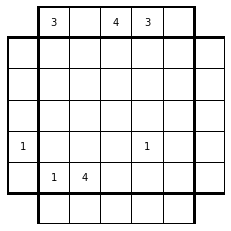

In [33]:
# Insert the dimension 'd'. Possible values: 4, 5, 6, 7
d = 5

# Utility variables
numbers = list(range(1,d+1))
cells = list(range((d+2)**2))
board_empty = np.zeros((d+2,d+2), dtype=int)

# Fill randomly the empty board and complete it with the external clues
fill(board_empty)
print('Filled board randomly generated:')
print(board_filled, '\n')
for i in range(d):
    board_filled[0,i+1] = n_visible(board_filled[1:-1,1:-1],i,'n')
    board_filled[-1,i+1] = n_visible(board_filled[1:-1,1:-1],i,'s')
    board_filled[i+1,0] = n_visible(board_filled[1:-1,1:-1],i,'w')
    board_filled[i+1,-1] = n_visible(board_filled[1:-1,1:-1],i,'e')
print('Complete board:')
print(board_filled, '\n')

# Create a Skyscrapers puzzle
print('Generated Skyscrapers puzzle:')
#print('Progress (/', (d+2)**2, '):   ')
create(board_filled)
print(board_filled)
print('Number of clues:', np.count_nonzero(board_filled), '\n')

# Solve the created Skyscrapers puzzle
n_solutions = 0
print('Solution:')
solve(board_filled)
#print(board_solved)
print('Number of solutions:', n_solutions, '\n')

# Print the created Skyscrapers puzzle
print('Printed generated Skyscrapers puzzle:')
board2pdf(board_filled)